In [56]:
import pandas as pd
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
import numpy as np

data = pd.read_csv("spotify_modified_data.csv", usecols=["Title", "Top Genre", "Beats Per Minute (BPM)", "Lyrics"])

In [57]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1994 entries, 0 to 1993
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Title                   1994 non-null   object
 1   Top Genre               1994 non-null   object
 2   Beats Per Minute (BPM)  1994 non-null   int64 
 3   Lyrics                  1711 non-null   object
dtypes: int64(1), object(3)
memory usage: 62.4+ KB


In [58]:
label_encoders = {}

for column in ["Title", "Top Genre"]:
    mode_value = data[column].mode()[0]
    data[column].fillna(mode_value, inplace=True)

lyrics_mode = data["Lyrics"].mode()[0]
data["Lyrics"].fillna(lyrics_mode, inplace=True)

for column in ["Title", "Top Genre"]:
    label_encoders[column] = LabelEncoder()
    data[column] = label_encoders[column].fit_transform(data[column])

vectorizer = TfidfVectorizer(max_features=10000)  
data['Lyrics'] = vectorizer.fit_transform(data["Lyrics"]).toarray()

C:\Users\harir\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\harir\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\harir\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\harir\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a

In [59]:
X = data.drop(columns=["Title"])
y = data["Title"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [60]:
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(X)

C:\Users\harir\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\harir\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\harir\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
C:\Users\harir\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: 

KMeans(n_clusters=5, random_state=42)

C:\Users\harir\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
C:\Users\harir\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
C:\Users\harir\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


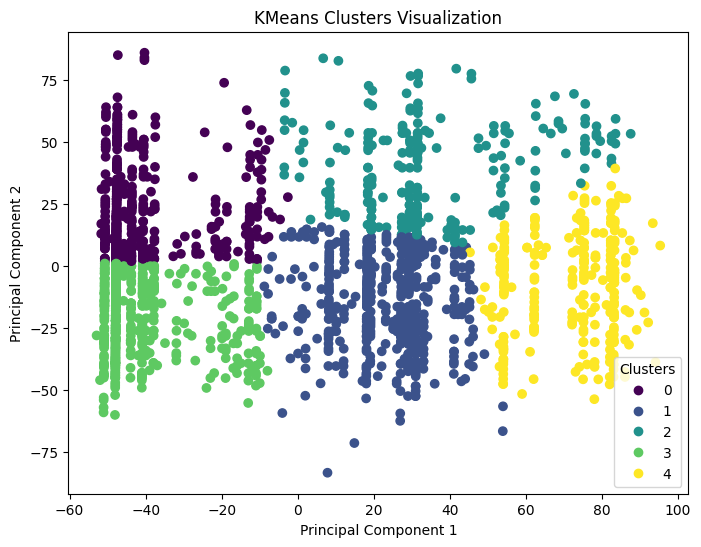

In [61]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
principal_components = pca.fit_transform(X)

# Create a dataframe with PCA results and cluster labels
pca_df = pd.DataFrame(data=principal_components, columns=["PC1", "PC2"])
pca_df["Cluster"] = kmeans.labels_

# Plot the clusters
plt.figure(figsize=(8, 6))
scatter = plt.scatter(pca_df["PC1"], pca_df["PC2"], c=pca_df["Cluster"], cmap="viridis")
plt.legend(handles=scatter.legend_elements()[0], labels=set(kmeans.labels_), title="Clusters")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("KMeans Clusters Visualization")
plt.show()

In [66]:
def recommend_songs(genre, tempo, lyrics):
  if genre == "":
    genre = "detroit hip hop"
  encoded_genre = label_encoders["Top Genre"].transform([genre])[0]
  lyrics = vectorizer.fit_transform(lyrics).toarray()[0][0]
  song_features = [[encoded_genre, tempo, lyrics]]
  
  cluster_prediction = kmeans.predict(song_features)[0]
  
  
  clustered_data = data[kmeans.labels_ == cluster_prediction]
  
  recommendations = []
  recommended_song_indexes = list(clustered_data["Title"].sample(5))
  for recommended_song_index in recommended_song_indexes:
    recommendations.append(label_encoders["Title"].inverse_transform([recommended_song_index])[0])
  
  return recommendations

genre = "pop"
tempo = 120
lyrics = ["""Listen to the song here in my heart
A melody I start, but can't complete
Listen, hmm, to the sound from deep within
It's only beginning to find release

Oh, the time has come for my dreams to be heard
They will not be pushed aside and turned
Into your own, all 'cause you won't listen

Listen, I am alone at a crossroads
I'm not at home in my own home
And I've tried and tried to say what's on my mind
You should have known, oh
Now I'm done believin' you
You don't know what I'm feelin'
I'm more than what you made of me
I followed the voice you gave to me
But now I've gotta find my own

You should have listened
There is someone here inside
Someone I thought had died
So long ago

Oh, I'm screamin' out
And my dreams will be heard
They will not be pushed aside or turned
Into your own, all 'cause you won't listen

Listen, I am alone at a crossroads
I'm not at home in my own home
And I've tried and tried to say what's on my mind
You should have known, oh
Now I'm done believin' you
You don't know what I'm feelin'
I'm more than what you made of me
I followed the voice you gave to me
But now I've gotta find my own

I don't know where I belong
But I'll be moving on
If you don't, if you won't

Listen to the song here in my heart
A melody I start, but I will complete
Now I'm done believin' you
You don't know what I'm feelin'
I'm more than what you made of me
I followed the voice you think you gave to me
But now I've gotta find my own

My own"""]
recommended_songs = recommend_songs(genre, tempo, lyrics)
print("Recommended Songs:", recommended_songs)

Recommended Songs: ['Empire State of Mind (Part II) Broken Down', 'Earth Song', 'When Love Comes To Town', 'Under Pressure - Remastered', 'Dirty Diana']


C:\Users\harir\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


In [63]:
from ytmusicapi import YTMusic
from __future__ import unicode_literals
import librosa
import youtube_dl
import os

output_dir = r'C:\Rushi\Music Recommendation System\Downloads'

ydl_opts = {
    'format': 'bestaudio/best',
    'postprocessors': [{
        'key': 'FFmpegExtractAudio',
        'preferredcodec': 'mp3',
        'preferredquality': '192',
    }],
    'outtmpl': os.path.join(output_dir, '%(title)s.%(ext)s'),
}

def clean_file():
    files = os.listdir('C:/Rushi/Music Recommendation System/Downloads/')
    for filename in files:
        print(f"C:/Rushi/Music Recommendation System/Downloads/{filename}")
        os.remove(f"C:/Rushi/Music Recommendation System/Downloads/{filename}")

def get_song_info(song_title,artist_name):
    song_name = song_title
    artist = artist_name
    yt = YTMusic('oauth.json')
    search_results = yt.search(f"""{artist} {song_name}""")
    videoId = ""
    is_artist_match = False
    try:
        for result in search_results:
            if result['resultType'] == 'song' and result['title'].lower() in song_title.lower():
                videoId = result['videoId']
                break
        print(videoId)
        with youtube_dl.YoutubeDL(ydl_opts) as ydl:
            ydl.download([f"https://music.youtube.com/watch?v={videoId}"])
        browse_id = yt.get_watch_playlist(videoId)['lyrics']
        filename = f'./Downloads/{song_title}.mp3'
        y, sr = librosa.load(filename)
        tempo, beat_frames = librosa.beat.beat_track(y=y, sr=sr)
        clean_file()
        print(tempo)

    except Exception as e:
        print(e)
        print("Error! Song is not found")
        return ["", "", ""]
    else:
        return ["",tempo,[(str(yt.get_lyrics(browse_id)['lyrics']))]]

In [64]:
def get_titles():
    data1 = pd.read_csv("spotify_modified_data.csv", usecols=["Title", "Top Genre", "Beats Per Minute (BPM)", "Lyrics"])
    data1 = data1.dropna()
    return data1["Title"].tolist()

def get_song_title_info(title):
    data1 = pd.read_csv("spotify_modified_data.csv", usecols=["Title", "Top Genre", "Beats Per Minute (BPM)", "Lyrics"])
    data1 = data1.dropna()
    song_info = data1[data1["Title"] == title].iloc[0]
    genre = song_info["Top Genre"]
    tempo = song_info["Beats Per Minute (BPM)"]
    lyrics = song_info["Lyrics"]
    return genre, tempo, [lyrics]

In [58]:
genre,tempo,lyrics = get_song_info("Rock You Like A Hurricane","Scorpions")

bNawbNsx52A
[youtube] bNawbNsx52A: Downloading webpage
[download] Destination: C:\Rushi\Music Recommendation System\Downloads\Rock You Like A Hurricane.m4a
[download] 100% of 3.90MiB in 01:06                 
[ffmpeg] Correcting container in "C:\Rushi\Music Recommendation System\Downloads\Rock You Like A Hurricane.m4a"
[ffmpeg] Destination: C:\Rushi\Music Recommendation System\Downloads\Rock You Like A Hurricane.mp3
Deleting original file C:\Rushi\Music Recommendation System\Downloads\Rock You Like A Hurricane.m4a (pass -k to keep)
C:/Rushi/Music Recommendation System/Downloads/Rock You Like A Hurricane.mp3
123.046875


In [59]:
recommended_songs = recommend_songs(genre, tempo, lyrics)
print("Recommended Songs:", recommended_songs)

Recommended Songs: ['How Can We Hang On To A Dream', 'Heading Up High', 'Ruthless Queen', 'Sexual Healing', 'Het Werd Zomer']


C:\Users\harir\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


In [ ]:
from fastapi import FastAPI, Query
from fastapi.middleware.cors import CORSMiddleware

from pydantic import BaseModel
import uvicorn
import asyncio
import logging


origins = [
    "http://localhost",
    "http://localhost:8080",
    "http://localhost:3000"
]



app = FastAPI()

app.add_middleware(
    CORSMiddleware,
    allow_origins=origins,
    allow_credentials=True,
    allow_methods=["*"],
    allow_headers=["*"],
)


@app.get("/get_songs_list/")
async def get_songs_list():
    songs_list = get_titles()
    return songs_list

@app.get("/get_recommendations/")
async def get_recommendations(inputSongName: str, inputArtistName: str):
    song_name = inputSongName
    artist_name = inputArtistName
    print(f"INPUT: {song_name}/t{artist_name}")
    
    genre,tempo,lyrics = get_song_info(song_name,artist_name) 
    songs = recommend_songs(genre, tempo, lyrics)
    print("Recommended songs: ",songs)
    return songs

@app.get("/get_recommendations_by_song/")
async def get_recommendations_by_song(selectedSong: str):
    genre, tempo, lyrics = get_song_title_info(selectedSong)
    songs = recommend_songs(genre, tempo, lyrics)
    print("Recommended songs: ",songs)
    return songs


if __name__ == "__main__":
    config = uvicorn.Config(app)
    server = uvicorn.Server(config)
    await server.serve()

INFO:     Started server process [6300]
INFO:     Waiting for application startup.
INFO:     Application startup complete.
INFO:     Uvicorn running on http://127.0.0.1:8000 (Press CTRL+C to quit)


INFO:     127.0.0.1:49957 - "GET /get_songs_list/ HTTP/1.1" 200 OK
INFO:     127.0.0.1:49958 - "GET /get_songs_list/ HTTP/1.1" 200 OK
INFO:     127.0.0.1:49965 - "GET /get_recommendations?inputSongName=Circles&inputArtistName=Post%20Malone HTTP/1.1" 307 Temporary Redirect
INPUT: Circles/tPost Malone
4EQkYVtE-28
[youtube] 4EQkYVtE-28: Downloading webpage
[download] Destination: C:\Rushi\Music Recommendation System\Downloads\Circles.webm
[download] 100% of 3.50MiB in 00:59                 
[ffmpeg] Destination: C:\Rushi\Music Recommendation System\Downloads\Circles.mp3
Deleting original file C:\Rushi\Music Recommendation System\Downloads\Circles.webm (pass -k to keep)
C:/Rushi/Music Recommendation System/Downloads/Circles.mp3
117.45383522727273
Recommended songs:  ['Wake Me up Before You Go-Go', 'Wêr Bisto', 'Jacob’s Song', 'Verdammt ich lieb dich - Remastered', 'Big in Japan']
INFO:     127.0.0.1:49965 - "GET /get_recommendations/?inputSongName=Circles&inputArtistName=Post%20Malone HTTP

C:\Users\harir\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


INFO:     127.0.0.1:49977 - "GET /get_recommendations_by_song?selectedSong=Love%20Me%20Tender HTTP/1.1" 307 Temporary Redirect
Recommended songs:  ['Immigrant Song - Remaster', 'The Sound of Silence', 'Hey You', 'Cloudbusting', 'Honky Tonk Women - Mono Version']
INFO:     127.0.0.1:49977 - "GET /get_recommendations_by_song/?selectedSong=Love%20Me%20Tender HTTP/1.1" 200 OK


C:\Users\harir\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
